In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
COLUMNS = ['Stream Type','Operation','Size','Max Concurrency', 'Time(ns)']

In [3]:
def loadFile(fname):
    df = pd.read_csv(fname,names=COLUMNS)
    df['Time(ms)']  = df['Time(ns)']*1e-6
    return df

def loadFiles(path):
    data = []
    fnames = glob.glob(path)
    for fname in fnames:
        data.append(loadFile(fname))
    df = pd.concat(data)
    return df

In [4]:
df = loadFile('results.csv')

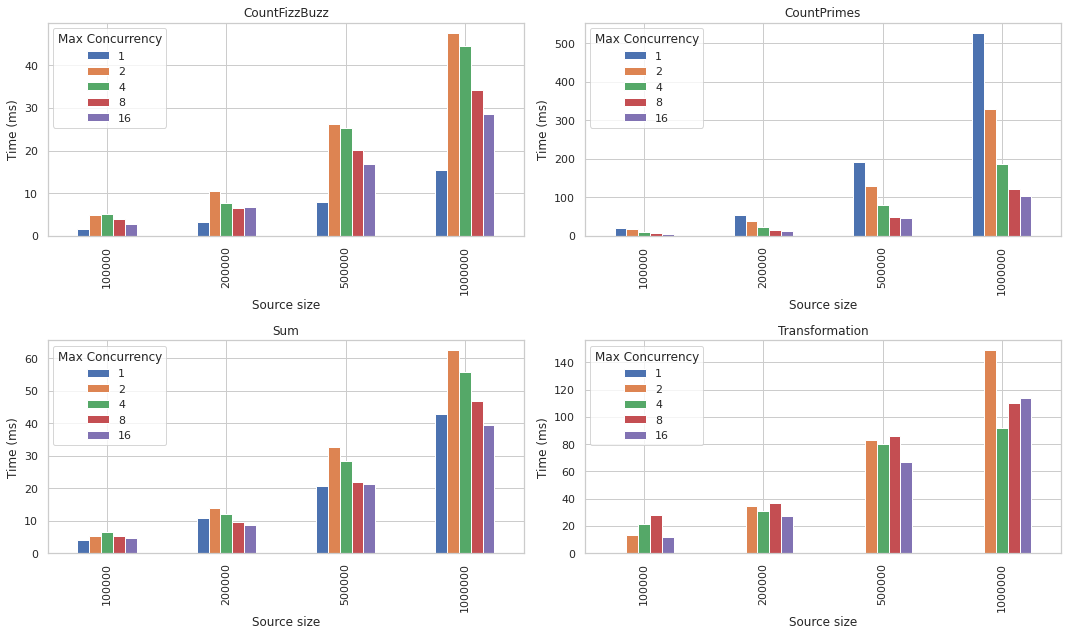

In [5]:
def plot_operations(df,operations):
    fig, ax = plt.subplots(2,2,figsize=(15,9))
    operation_index = 0
    for i in range(2):
        for j in range(2):
            operation = operations[operation_index]
            sub_df = df[df['Operation']==operation]
            sub_df.groupby(['Size','Max Concurrency'])['Time(ms)'].mean().unstack().plot.bar(subplots=False,ax=ax[i,j])
            title = f"{operation}"
            ax[i,j].set_title(title)
            ax[i,j].set_xlabel('Source size')
            ax[i,j].set_ylabel('Time (ms)')
            operation_index = operation_index + 1
    fig.tight_layout()
    plt.savefig("visuals/streams.png")
    
operations = df['Operation'].unique()  
plot_operations(df,operations)